# CNN for mnist dataset

## Import Package

In [1]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

## Import Dataset dan Split Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# Visualisasi Data

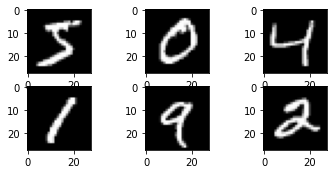

In [3]:
for i in range(6):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

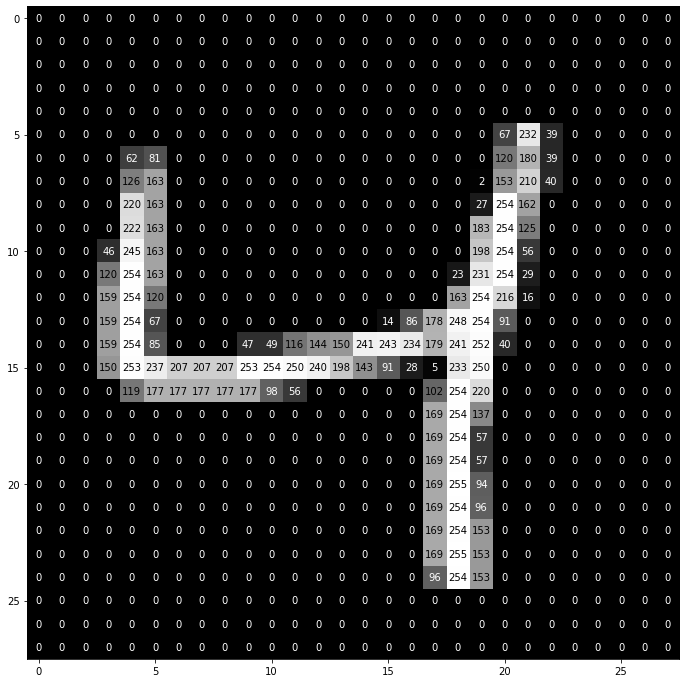

In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[2].reshape(28,28), ax)

## Melihat jumlah dan ukuran Dataset

In [5]:
print(f'Data train: X = {X_train.shape}, y = {y_train.shape}')
print(f'Data test: X = {X_test.shape}, y = {y_test.shape}')

Data train: X = (60000, 28, 28), y = (60000,)
Data test: X = (10000, 28, 28), y = (10000,)


## Reshape dan Normalize dataset

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28,28,1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28,28,1)).astype('float32')

In [8]:
X_train = X_train/255
X_test = X_test/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

print(f'Data train: X = {X_train.shape}, y = {y_train.shape}')
print(f'Data test: X = {X_test.shape}, y = {y_test.shape}')
print(f'Jumlah Kelas: {num_classes}')

Data train: X = (60000, 28, 28, 1), y = (60000, 10)
Data test: X = (10000, 28, 28, 1), y = (10000, 10)
Jumlah Kelas: 10


# Build Model

In [9]:
model = Sequential([
  layers.Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(15, (3, 3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(50, activation='relu'),
  layers.Dense(num_classes, activation='softmax')                 
])

# Compile model
model.compile(loss='categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 15)          0         
                                                                 
 flatten (Flatten)           (None, 375)               0

# Training Model

In [10]:
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10, 
                    batch_size=32,
                    verbose=1)
scores = model.evaluate(X_test,y_test, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.1916 - accuracy: 0.9397 - val_loss: 0.0540 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0708 - accuracy: 0.9782 - val_loss: 0.0364 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.0342 - val_accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0466 - accuracy: 0.9853 - val_loss: 0.0527 - val_accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0369 - accuracy: 0.9877 - val_loss: 0.0353 - val_accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.0286 - val_accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0301 - accuracy: 0.9901 - val_loss: 0.0274 - val_accuracy

# Plot Hasil Training

In [11]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r-', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r-', label='Training Loss')
  plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

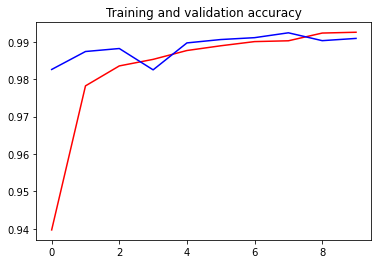

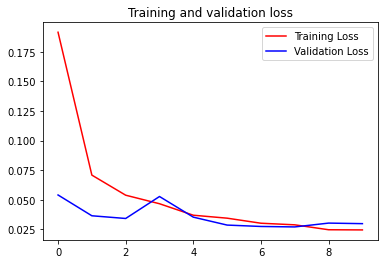

In [12]:
plot_loss_acc(history)

# Mencoba Model yang dibuat

In [17]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  # predicting images
  path='/content/' + fn
  print(path)
  img=image.load_img(path,grayscale=True, target_size=(28, 28))
  
  x=image.img_to_array(img)
  x = x.reshape(1, 28, 28, 1)
  x = x.astype('float32')
  x /= 255
  
  predict_value = model.predict(x)
  digit = np.argmax(predict_value)
  print(digit)

Saving empat.png to empat.png
Saving tiga.png to tiga.png
/content/empat.png
4
/content/tiga.png
3


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


# Save Model

In [18]:
model.save('mnist_model.h5')